In [ ]:
%pip install mediapipe
%pip install roboflow supervision 

## Mediapipe on static image

In [ ]:
import mediapipe as mp
import cv2
import numpy as np

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load image
img = cv2.imread('asl_data/train/X21_jpg.rf.f7dcb8c4df1b628a748a0552457fdaf5.jpg')

# Check if image was loaded successfully
if img is None:
    print("Error: Unable to load image.")
    exit()

# Convert BGR to RGB for MediaPipe
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = img.shape

# Process the image with MediaPipe
results = hands.process(img_rgb)
points = {}

# Extract landmark points
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for i, landmark in enumerate(hand_landmarks.landmark):
            points[i] = (int(landmark.x * width), int(landmark.y * height))   # to get point coordinates

# Create blank white image
output_img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Draw hand landmarks and connections
if len(points) == 21:  # Ensure a full hand is detected
    for hc in mp_hands.HAND_CONNECTIONS:
        cv2.line(img, points[hc[0]], points[hc[1]], (0, 0, 255), 4)
        cv2.line(output_img, points[hc[0]], points[hc[1]], (0, 0, 255), 4)


# Display original image with landmarks
for point in points.values():
    cv2.circle(img, point, 5, (255, 0, 0), -1)
    cv2.circle(output_img, point, 5, (255, 0, 0), -1)

# Show the images
cv2.imshow('Original Image', img)
cv2.imshow('Hand Tracking', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




loading Roboflow workspace...
loading Roboflow project...
['A']


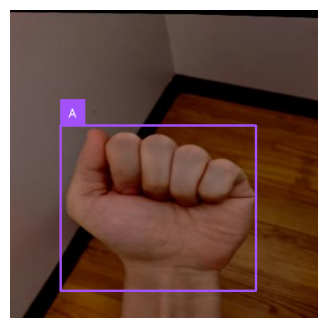

In [8]:
from roboflow import Roboflow
import supervision as sv
import cv2

image_path = "asl_data/train/A11_jpg.rf.bf055dc8a9a5a85bed0cc1f792c56a01.jpg"
image = cv2.imread(image_path)

# Check if image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
    exit()

rf = Roboflow(api_key="3njVsAWJotNGOdz9GK1B")
project = rf.workspace().project("american-sign-language-letters")
model = project.version(6).model

result = model.predict(image, confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
box_annotator = sv.BoxAnnotator()

image = cv2.imread(image_path)

annotated_image = box_annotator.annotate(image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections, labels=labels)

print(labels)
sv.plot_image(image=annotated_image, size=(4, 4))

## Mediapipe on video feed

In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2

cap = cv2.VideoCapture(0)

rf = Roboflow(api_key="3njVsAWJotNGOdz9GK1B")
project = rf.workspace().project("american-sign-language-letters")
model = project.version(6).model

label_annotator = sv.LabelAnnotator()
box_annotator = sv.BoxAnnotator()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to capture frame.")
        break

    # Flip frame for a mirror effect
    frame = cv2.flip(frame, 1)
    temp_image_path = "temp_frame.jpg"
    cv2.imwrite(temp_image_path, frame) 

    # Convert frame to RGB (MediaPipe requires RGB)
    # image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    result = model.predict(temp_image_path, confidence=40, overlap=30).json()

    labels = [item["class"] for item in result["predictions"]]

    detections = sv.Detections.from_inference(result)

    # image = cv2.imread(frame)

    annotated_image = box_annotator.annotate(frame, detections=detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections, labels=labels)

    # sv.plot_image(image=annotated_image, size=(4, 4))

    # Display the output
    cv2.imshow("Hand Tracking", annotated_image)

    # Exit condition
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

In [9]:
import mediapipe as mp
import cv2
import numpy as np

# Initialize the camera
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.5, 
                        min_tracking_confidence=0.5)

# Drawing utility
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Flip frame for a mirror effect
    frame = cv2.flip(frame, 1)
    height, width, _ = frame.shape  # Get frame dimensions

    # Convert frame to RGB (MediaPipe requires RGB)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process frame with MediaPipe
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw landmarks and connections
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Display the output
    cv2.imshow("Hand Tracking", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1739795380.938820   31947 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1739795380.940687   41982 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: llvmpipe (LLVM 12.0.0, 256 bits)
W0000 00:00:1739795380.964037   41968 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739795380.992672   41971 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
